# Reporte de Análisis VIII

## Identificando y Excluyendo Outliers

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [28]:
datos = pd.read_csv('alquiler_muestra.csv', sep = ';')
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
0,Departamento,San Borja,3,2,1,320,3200.0,1319.0,0.0,10.00,Departamento
1,Departamento,Lurigancho,2,0,0,59,800.0,725.0,47.0,13.56,Departamento
2,Departamento,Ate,3,2,1,147,7500.0,1000.0,381.0,51.02,Departamento
3,Departamento,Pachacámac,3,3,3,270,14999.0,2800.0,1200.0,55.55,Departamento
4,Departamento,Barranco,2,1,0,65,1200.0,640.0,97.0,18.46,Departamento
5,Departamento,Comas,2,1,1,75,1400.0,715.0,0.0,18.67,Departamento
6,Departamento,El Agustino,1,0,0,52,1700.0,560.0,0.0,32.69,Departamento
7,Departamento,Mi Perú,2,1,0,70,1200.0,430.0,21.0,17.14,Departamento
8,Departamento,Lurigancho,1,1,0,59,1500.0,410.0,0.0,25.42,Departamento
9,Departamento,Chorrillos,3,0,0,100,2500.0,980.0,105.0,25.00,Departamento


In [7]:
datos.describe().round(0)

,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,3.0,1.0,1.0,137.0,5396.0,1238.0,566.0,37.0
std,1.0,20.0,1.0,143.0,47684.0,1400.0,4845.0,175.0
min,0.0,0.0,0.0,10.0,100.0,0.0,0.0,3.0
25%,2.0,0.0,0.0,65.0,1600.0,520.0,0.0,21.0
50%,2.0,1.0,1.0,90.0,2700.0,890.0,125.0,30.0
75%,3.0,2.0,1.0,155.0,5500.0,1546.0,377.0,42.0
max,14.0,1960.0,14.0,3000.0,4500000.0,50500.0,450625.0,15000.0


(100.0, 4500000.0)

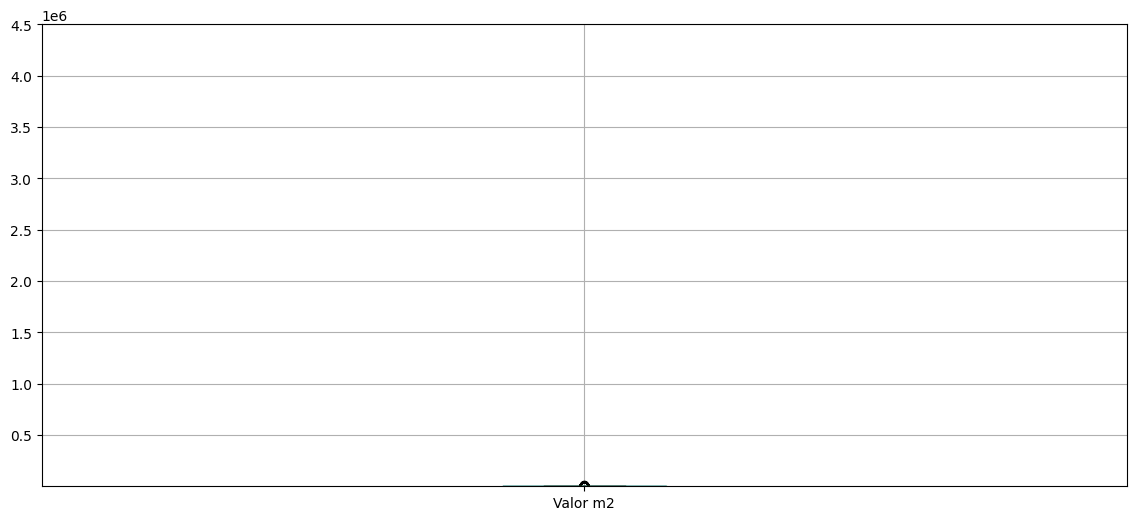

In [11]:
datos.boxplot(['Valor m2']).set_ylim((datos.Valor.min(), datos.Valor.max()))

In [29]:
datos[datos['Valor m2'] <= 3000]

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
0,Departamento,San Borja,3,2,1,320,3200.0,1319.0,0.0,10.00,Departamento
1,Departamento,Lurigancho,2,0,0,59,800.0,725.0,47.0,13.56,Departamento
2,Departamento,Ate,3,2,1,147,7500.0,1000.0,381.0,51.02,Departamento
3,Departamento,Pachacámac,3,3,3,270,14999.0,2800.0,1200.0,55.55,Departamento
4,Departamento,Barranco,2,1,0,65,1200.0,640.0,97.0,18.46,Departamento
...,...,...,...,...,...,...,...,...,...,...,...
9995,Departamento,Santa Rosa,3,1,2,160,15500.0,1600.0,435.0,96.88,Departamento
9996,Departamento,Santa Rosa,4,0,0,190,6000.0,1000.0,0.0,31.58,Departamento
9997,Departamento,Lince,2,1,1,70,2800.0,750.0,160.0,40.00,Departamento
9998,Departamento,Barranco,1,0,0,50,1700.0,360.0,20.0,34.00,Departamento


In [30]:
valor = datos['Valor m2']

In [31]:
Q1 = valor.quantile(.25)#Cuartil
Q3 = valor.quantile(.75)#Tercer cuartil     Q2=valor.quantile(.50)#Mediana
IIQ = Q3 - Q1#Intervalo Inter Cuartil       IIQ = Q2#Intervalo Inter Cuartil 
limite_inferior = Q1 - 1.5 * IIQ           #limite_inferior = Q1 - 1.5 * IIQ 
limite_superior = Q3 + 1.5 * IIQ           #limite_superior = Q3 - 1.5 * IIQ

In [32]:
seleccion = (valor >= limite_inferior) & (valor <= limite_superior)
datos_new = datos[seleccion]

In [34]:
Q1,Q3,limite_superior,limite_inferior

(21.25, 42.31, 73.9, -10.340000000000003)

<Axes: >

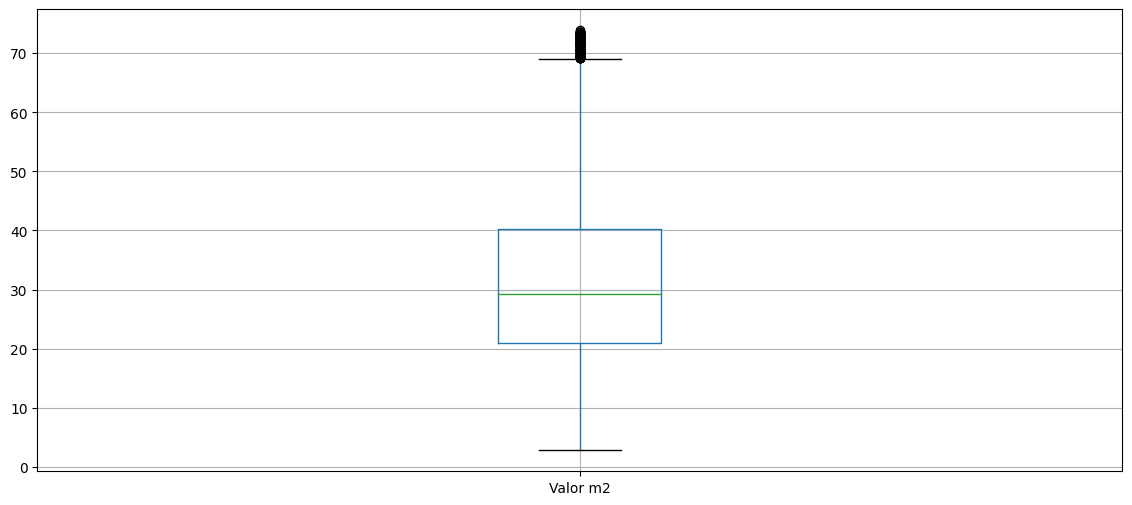

In [35]:
datos_new.boxplot(['Valor m2'])

array([[<Axes: title={'center': 'Valor m2'}>]], dtype=object)

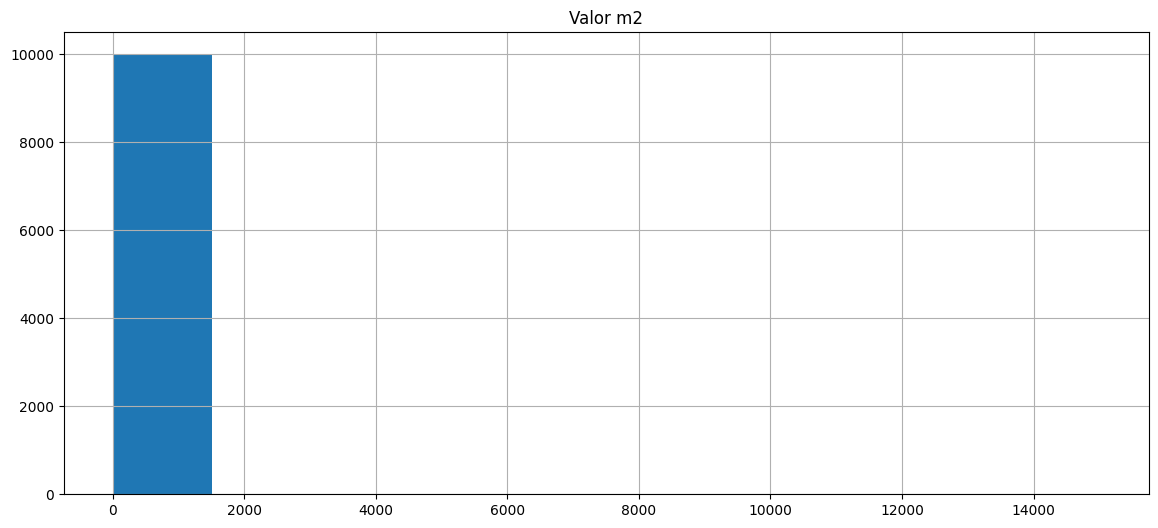

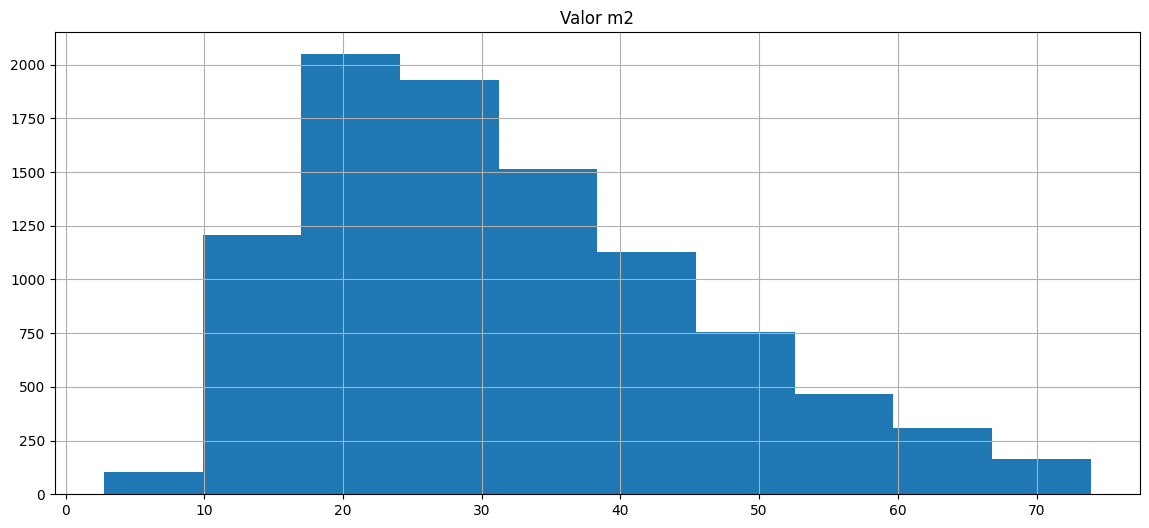

In [36]:
datos.hist(['Valor m2'])
datos_new.hist(['Valor m2'])